# Floating Wave with Staggered Layout Scenario Example

In [1]:
%matplotlib inline

Prepare the test data for loading. The files required can be found in the test_data directory of the source code and should be copied to the directory that the notebook is running. When the python file is run a pickle file is generated containing a dictionary of inputs.

In [2]:
%run floating_wave_staggered_layout_scenario.py

generate test data: d:\Users\108386\Desktop\notebooks\Meeting Edinburgh - renamed\floating_wave_staggered_layout_scenario.pkl


In [3]:
from IPython.display import display, HTML

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [5]:
import numpy as np
from datetime import datetime

In [6]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import DataMenu, ModuleMenu, ProjectMenu, ThemeMenu
from dtocean_core.pipeline import Tree, _get_connector
from dtocean_core.extensions import StrategyManager

In [7]:
# Bring up the logger
start_logging()

2016-09-12 11:52:05,630 - INFO - dtocean_core - Begin logging for dtocean_core.


In [8]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message
def html_variable(core, project, variable):
    value = variable.get_value(core, project)
    metadata = variable.get_metadata(core)
    name = metadata.title
    units = metadata.units
    message = "<b>{}:</b> {}".format(name, value)
    if units:
        message += " ({})".format(units[0])
    return message

## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [9]:
new_core = Core()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
theme_menu = ThemeMenu()
data_menu = DataMenu()
pipe_tree = Tree()

## Create a new project and tree

In [10]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-09-12 11:52:09,795 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-09-12 11:52:09,796 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-09-12 11:52:09,798 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Set the device type

In [11]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Wave Floating")
my_var.read(new_core, new_project)

2016-09-12 11:52:09,818 - INFO - aneris.control.data - New "device.system_type" data stored with index L76NI9
2016-09-12 11:52:09,819 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [12]:
project_menu.initiate_pipeline(new_core, new_project)

2016-09-12 11:52:09,838 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-09-12 11:52:09,841 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index T1QSPR
2016-09-12 11:52:09,842 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-09-12 11:52:09,845 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-09-12 11:52:09,845 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.


## Discover available modules

In [13]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate some modules

Note that the order of activation is important and that we can't deactivate yet!

In [14]:
module_menu.activate(new_core, new_project, 'Hydrodynamics')
module_menu.activate(new_core, new_project, 'Electrical Sub Systems')
module_menu.activate(new_core, new_project, 'Mooring and Foundations')


## Activate the Economics and Reliability themes

In [15]:
names = theme_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

In [16]:
theme_menu.activate(new_core, new_project, "Economics")
theme_menu.activate(new_core, new_project, "Environmental Impact Assessment")

In [17]:
# Here we are expecting Hydrodynamics
assert _get_connector(new_project, "modules").get_current_interface_name(new_core, new_project) == "Hydrodynamics"

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [18]:
project_menu.initiate_dataflow(new_core, new_project)

2016-09-12 11:52:09,990 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index TK1JV0
2016-09-12 11:52:09,990 - INFO - aneris.control.simulation - Datastate stored
2016-09-12 11:52:10,009 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Create the branches assosiated to the modules

In [19]:
hydro_branch = pipe_tree.get_branch(new_core, new_project, "Hydrodynamics")
electro_branch = pipe_tree.get_branch(new_core, new_project, 'Electrical Sub Systems')
moorings_branch = pipe_tree.get_branch(new_core, new_project, 'Mooring and Foundations')
eco_branch = pipe_tree.get_branch(new_core, new_project, "Economics")
env_branch = pipe_tree.get_branch(new_core, new_project, "Environmental Impact Assessment")

## Load test data

In [20]:
hydro_branch.read_test_data(new_core,
                            new_project,
                            "floating_wave_staggered_layout_scenario.pkl")

2016-09-12 11:52:10,148 - INFO - aneris.control.data - New "farm.wave_series" data stored with index AH9X3B
2016-09-12 11:52:10,151 - INFO - aneris.control.data - New "device.installation_depth_max" data stored with index MGQVT5
2016-09-12 11:52:10,151 - INFO - aneris.control.data - New "device.coordinate_system" data stored with index Z504VB
2016-09-12 11:52:10,153 - INFO - aneris.control.data - New "device.minimum_distance_x" data stored with index 6MEVTG
2016-09-12 11:52:10,154 - INFO - aneris.control.data - New "device.minimum_distance_y" data stored with index JVS027
2016-09-12 11:52:10,154 - INFO - aneris.control.data - New "options.boundary_padding" data stored with index MOWAVT
2016-09-12 11:52:10,155 - INFO - aneris.control.data - New "device.installation_depth_min" data stored with index TFGPLF
2016-09-12 11:52:10,157 - INFO - aneris.control.data - New "device.wave_data_directory" data stored with index 2XIG8Q
2016-09-12 11:52:10,158 - INFO - aneris.control.data - New "site.l

In [21]:
electro_branch.read_test_data(new_core,
                              new_project,
                              "floating_wave_staggered_layout_scenario.pkl")

2016-09-12 11:52:10,371 - INFO - aneris.control.data - New "device.constant_power_factor" data stored with index W00QQP
2016-09-12 11:52:10,371 - INFO - aneris.control.data - New "component.power_quality" data stored with index TO5B03
2016-09-12 11:52:10,372 - INFO - aneris.control.data - New "corridor.shipping_hist" data stored with index MS209V
2016-09-12 11:52:10,375 - INFO - aneris.control.data - New "component.switchgear" data stored with index FYL2O5
2016-09-12 11:52:10,377 - INFO - aneris.control.data - New "component.collection_points" data stored with index XOYPF6
2016-09-12 11:52:10,378 - INFO - aneris.control.data - New "component.dry_mate_connectors" data stored with index CEK0FG
2016-09-12 11:52:10,380 - INFO - aneris.control.data - New "device.voltage" data stored with index SLZROC
2016-09-12 11:52:10,381 - INFO - aneris.control.data - New "farm.shipping_hist" data stored with index UB1DA9
2016-09-12 11:52:10,381 - INFO - aneris.control.data - New "corridor.max_seabed_tem

In [22]:
moorings_branch.read_test_data(new_core,
                               new_project,
                               "floating_wave_staggered_layout_scenario.pkl")

2016-09-12 11:52:10,655 - INFO - aneris.control.data - New "device.depth_variation_permitted" data stored with index NYHJ4T
2016-09-12 11:52:10,657 - INFO - aneris.control.data - New "bathymetry.line_bearing_capacity_factor" data stored with index NX8T6X
2016-09-12 11:52:10,658 - INFO - aneris.control.data - New "farm.mooring_ALS_safety_factor" data stored with index 5U3HBK
2016-09-12 11:52:10,660 - INFO - aneris.control.data - New "device.system_profile" data stored with index Q3DUUD
2016-09-12 11:52:10,661 - INFO - aneris.control.data - New "farm.wave_gamma_100_year" data stored with index A3EGRF
2016-09-12 11:52:10,661 - INFO - aneris.control.data - New "farm.mooring_ULS_safety_factor" data stored with index TG7NEP
2016-09-12 11:52:10,663 - INFO - aneris.control.data - New "constants.gravity" data stored with index T4W9DH
2016-09-12 11:52:10,664 - INFO - aneris.control.data - New "constants.cylinder_drag" data stored with index C5SEPX
2016-09-12 11:52:10,665 - INFO - aneris.control.

In [23]:
env_branch.read_test_data(new_core,
                               new_project,
                               "floating_wave_staggered_layout_scenario.pkl")

2016-09-12 11:52:10,918 - INFO - aneris.control.data - New "farm.hydro_measured_turbidity" data stored with index ET5D8U
2016-09-12 11:52:10,921 - INFO - aneris.control.data - New "farm.elec_measured_magnetic_field" data stored with index L83A48
2016-09-12 11:52:10,921 - INFO - aneris.control.data - New "farm.elec_measured_noise" data stored with index 6IMWSU
2016-09-12 11:52:10,923 - INFO - aneris.control.data - New "farm.initial_magnetic_field" data stored with index F8P63J
2016-09-12 11:52:10,924 - INFO - aneris.control.data - New "farm.hydro_reserve_effect_weight" data stored with index ZTB8RG
2016-09-12 11:52:10,924 - INFO - aneris.control.data - New "farm.hydro_measured_noise" data stored with index 0ILD37
2016-09-12 11:52:10,926 - INFO - aneris.control.data - New "farm.moor_measured_noise" data stored with index WUIYGP
2016-09-12 11:52:10,927 - INFO - aneris.control.data - New "farm.protected_table" data stored with index XO6ZV6
2016-09-12 11:52:10,928 - INFO - aneris.control.da

## Check the status of the inputs

* satisfied - data is in the data state
* required - data is not in the data state
* unavailable - data will come from another source

In [24]:
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [25]:
input_status = electro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [26]:
input_status = moorings_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Prepare the Economics Theme

In [27]:
theme_name = "Economics"
input_status = eco_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Prepare the Environmental Theme

In [28]:
theme_name = "Environmental Impact Assessment"
input_status = eco_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Set the discount rate, device cost and project lifetime

In [29]:
discount_rate = 0.05
device_cost = 1000000

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "project.discount_rate")
new_var.set_raw_interface(new_core, discount_rate)
new_var.read(new_core, new_project)

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "device.system_cost")
new_var.set_raw_interface(new_core, device_cost)
new_var.read(new_core, new_project)

2016-09-12 11:52:11,039 - INFO - aneris.control.data - New "project.discount_rate" data stored with index 0BQA2H
2016-09-12 11:52:11,040 - INFO - aneris.control.simulation - Datastate stored
2016-09-12 11:52:11,059 - INFO - aneris.control.data - New "device.system_cost" data stored with index ODYW58
2016-09-12 11:52:11,059 - INFO - aneris.control.simulation - Datastate stored


## Check if the modules can be executed

In [30]:
can_execute = module_menu.is_executable(new_core, new_project, 'Hydrodynamics')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Electrical Sub Systems')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Mooring and Foundations')
display(can_execute)

input_status = moorings_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)

input_status = eco_branch.get_input_status(new_core, new_project)
message += html_dict(input_status)
HTML(message)

True

False

False

## See what execution strategies are available

First the strategy manager in required to collect the strategy plugins.

In [31]:
strategy_manager = StrategyManager()

In [32]:
strategy_list = strategy_manager.get_available_strategies()
message = html_list(strategy_list)
HTML(message)

## Execute the Basic strategy

The "basic" strategy simply exectutes the chosen modules in sequence 

In [33]:
basic_strategy = strategy_manager.get_strategy("Basic")
basic_strategy.execute(new_core, new_project)

2016-09-12 11:52:11,141 - INFO - aneris.control.simulation - Datastate with level "hydrodynamics start" stored
No NOGO areas related to the machine depthinstallation constraints have been found.
2016-09-12 11:52:11,249 - WARNING - dtocean_hydro.input - [Warning] The wave module cannot run with variable bathymetry
The bathymetry is reduced to its average value.
2016-09-12 11:52:11,250 - INFO - dtocean_hydro.input - The averge bathymetry value is -80.0 m
2016-09-12 11:52:12,007 - INFO - dtocean_hydro.input - --> MACHINE INPUT SUMMARY:

{   'Clen': None,
    'Floatflag': True,
    'InstalDepth': (-inf, 0.0),
    'MaxNumDevices': 5,
    'MinDist': (200.0, 200.0),
    'OptThreshold': 0.9,
    'RatedPowerArray': 1.5,
    'RatedPowerDevice': 0.3,
    'Type': 'Wave',
    'UserArray': {   'Option': 1, 'Value': 'staggered'},
    'UserOutputTable': None,
    'YawAngle': 360.0,
    'lCS': array([ 0.,  0.,  0.]),
    'tidalFlag': False,
    'tidal_bidirectional': None,
    'tidal_cutinout': None,
 

C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:3327: ComplexWarning: Casting complex values to real discards the imaginary part
  if math.fabs(HsysloadX) < 1e-10:
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:3329: ComplexWarning: Casting complex values to real discards the imaginary part
  if math.fabs(HsysloadY) < 1e-10:
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:3936: ComplexWarning: Casting complex values to real discards the imaginary part
  Vloaddiffmag.append(math.fabs(Vfsys[l] - sum(Vfline)))
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:3942: ComplexWarning: Casting complex values to real discards the imaginary part
  / (HsysloadY - sum(HflineY)))
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moor

2016-09-12 12:51:40,263 - INFO - dtocean_moorings.core - 
------------------------------------------------------------
Mooring line 0 average weight per unit length [dry[N/m], wet[N/m]] and axial stiffness [N] [29.271041760151018, 22.925075646110098, 185915.46971774567]
------------------------------------------------------------
2016-09-12 12:51:40,265 - INFO - dtocean_moorings.core - 
------------------------------------------------------------
Mooring line 1 average weight per unit length [dry[N/m], wet[N/m]] and axial stiffness [N] [29.271041760151018, 22.925075646110098, 185915.46971774567]
------------------------------------------------------------
2016-09-12 12:51:40,266 - INFO - dtocean_moorings.core - 
------------------------------------------------------------
Mooring line 2 average weight per unit length [dry[N/m], wet[N/m]] and axial stiffness [N] [29.271041760151018, 22.925075646110098, 185915.46971774567]
------------------------------------------------------------
2016

C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:4090: ComplexWarning: Casting complex values to real discards the imaginary part
  if round(Vfsys[l] - sum(Vfline), 3) > 0.0:
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:4093: ComplexWarning: Casting complex values to real discards the imaginary part
  if round(Vfsys[l] - sum(Vfline), 3) < 0.0:


2016-09-12 12:51:42,595 - INFO - dtocean_moorings.core - 
Draft equilibrium at 0.0424388108916 reached after 1026 run(s)
New local system position (device frame of reference) at [1.1351270665180804, 0.0, 0.042438810891633115]
New global system position (with rotation) at [1438.8648729334818, 1040.0, 0.042438810891633115]
2016-09-12 12:51:42,615 - INFO - dtocean_moorings.core - 
_________________________________________________
Run number 2
Wave condition number 0
2016-09-12 12:51:42,618 - INFO - dtocean_moorings.core - Analysed lines: [1 2]
2016-09-12 12:51:42,950 - INFO - dtocean_moorings.core - 
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Device displacement limit exceeded!
System position at failure = ('ALS', [141.40546226278548, -14.325957694713434, 0.05372203772854775])
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
2016-09-12 12:51:42,951 - INFO - dtocean_moorings.core - 
_________________________________________________________________________
System applied loads [Hsys

ZeroDivisionError: float division by zero

## Examine the Hydrodynamics results

Currently, there is no robustness built into the core, so the assumption is that the modules executed successfully. This will have to be improved towards deployment of the final software.

Lets see what outputs are available from the Hydrodynamics module.

In [34]:
hydro_branch.inspect(new_core, new_project)

In [35]:
output_status = hydro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

Let's check the number of devices and annual output of the farm, using just information in the data object.

In [36]:
n_devices = hydro_branch.get_output_variable(new_core, new_project, "farm.number_of_devices")
meta_data = n_devices.get_metadata(new_core)
name = meta_data.title
value = n_devices.get_value(new_core, new_project)
message_one = "<p><b>{}:</b> {}</p>".format(name, value)

farm_annual_energy = hydro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

farm_device_power = hydro_branch.get_output_variable(new_core, new_project, "farm.mean_power_per_device")
meta_data = farm_device_power.get_metadata(new_core)
name = meta_data.title
value = farm_device_power.get_value(new_core, new_project)
units = meta_data.units[0]
message_three = "<p><b>{}</b> ({}):{}</p>".format(name, units, html_dict(value))

HTML(message_one + message_two + message_three)

In [37]:
layout = hydro_branch.get_output_variable(new_core, new_project, "farm.layout")
layout.get_value(new_core, new_project)

{'Device001': <shapely.geometry.point.Point at 0x27a8db38>}

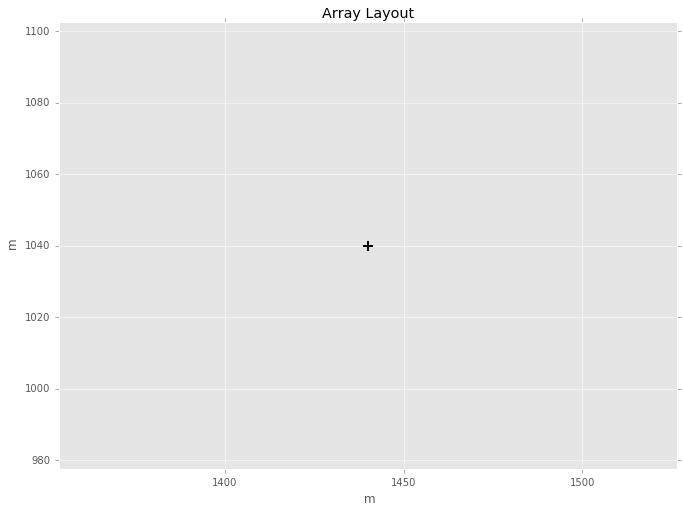

In [38]:
layout.plot(new_core, new_project)

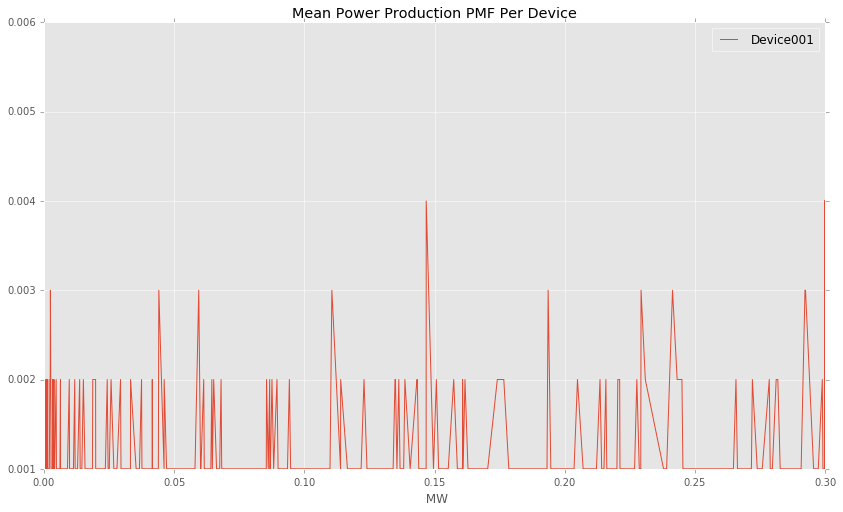

In [39]:
power_pmf = hydro_branch.get_output_variable(new_core, new_project, "farm.mean_power_pmf_per_device")
power_pmf.plot(new_core, new_project)
power_pmf_value = power_pmf.get_value(new_core, new_project)

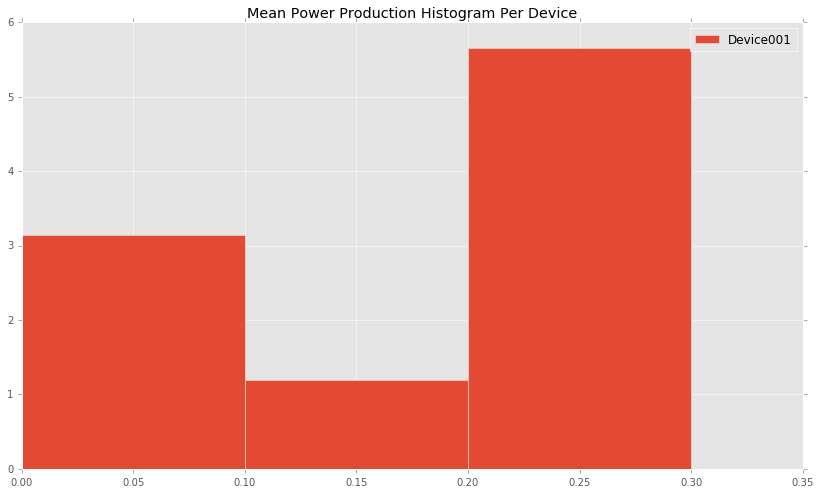

In [40]:
power_hist = electro_branch.get_input_variable(new_core, new_project, "farm.mean_power_hist_per_device")
power_hist.plot(new_core, new_project)

## Examine the Electrical Sub-systems results

Lets see what outputs are available from the modules.

In [41]:
electro_branch.inspect(new_core, new_project)

In [42]:
output_status = electro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [43]:
farm_annual_energy = hydro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

HTML(message_two)

In [44]:
electrical_cost = electro_branch.get_output_variable(new_core, new_project,
                                                     "farm.electrical_economics_data")
                                            
cost_data = electrical_cost.get_value(new_core, new_project)

In [45]:
cost_data

,Cost,Key Identifier,Quantity,Year
0,600.0,3.0,4094.722563,0
1,600.0,1.0,10.000000,0
2,700.0,2.0,1640.000000,0
3,150000.0,11.0,1.000000,0
4,150000.0,5.0,1.000000,0
5,1000000.0,NaN,1.000000,0


In [46]:
substations = electro_branch.get_output_variable(new_core, new_project,
                                                 "farm.substation_layout")
if substations.has_value(new_core, new_project): substations.get_value(new_core, new_project)

## Examine the Mooring and Foundations results

Lets see what outputs are available from the modules.

In [47]:
moorings_branch.inspect(new_core, new_project)

In [48]:
output_status = moorings_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

## Examine Economics Results

In [49]:
output_status = eco_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [50]:
lcoe = eco_branch.get_output_variable(new_core, new_project, "project.lcoe")
lcoe_capex = eco_branch.get_output_variable(new_core, new_project, "project.capex_lcoe")
total_cost = eco_branch.get_output_variable(new_core, new_project, "project.capex_total")
discount_energy = eco_branch.get_output_variable(new_core, new_project, "project.discounted_energy")
cost_breakdown = eco_branch.get_output_variable(new_core, new_project, "project.capex_breakdown")

In [51]:
message_lcoe = html_variable(new_core, new_project, lcoe)
message_cost = html_variable(new_core, new_project, total_cost)
message_energy = html_variable(new_core, new_project, discount_energy)
message = "<p>{}</p><p>{}</p><p>{}</p>".format(message_lcoe, message_cost, message_energy)
HTML(message)

## Plot the balance of CAPEX costs

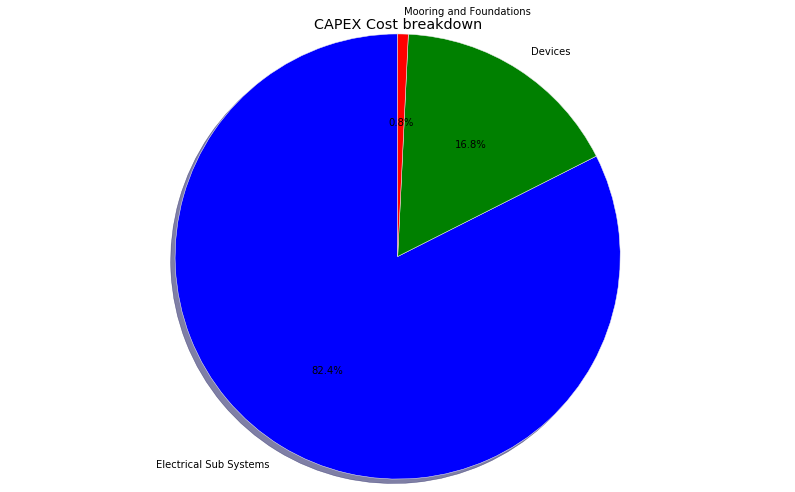

In [52]:
# The slices will be ordered and plotted counter-clockwise.
cost_data = cost_breakdown.get_value(new_core, new_project)
labels = cost_data.keys()
sizes = cost_data.values()
metadata = cost_breakdown.get_metadata(new_core)
colors = ['lightblue', 'hotpink']

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title(metadata.title)

plt.show()

# HTML in matplotlib?

In [53]:
msg = html_dict(cost_data)
HTML(msg)

## Examine Environmental Results

In [55]:
output_status = env_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [56]:
hydro_season = env_branch.get_output_variable(new_core, new_project, "farm.hydro_season")
hydro_season.get_value(new_core,new_project)

ValueError: Variable ID "farm.hydro_season" is not contained in the active data state.

In [ ]:
elec_confidence = env_branch.get_output_variable(new_core, new_project, "farm.elec_confidence")
elec_confidence.get_value(new_core,new_project)